### Importando pacotes e analisando a base de dados

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# leitura da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/edilton-bs/AV1IntroCD/main/data/dados_bruto.csv')

df.head()

,_id,co_uf,no_uf,ano,variavel,social_categoria,social_subcategoria,valor
0,1,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,24839.0
1,2,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,111275.0
2,3,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,55947.0
3,4,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,31536.0
4,5,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de pessoas cadastradas em famílias ...,37969.0


In [4]:
# informações sobre os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _id                  4860 non-null   int64  
 1   co_uf                4860 non-null   int64  
 2   no_uf                4860 non-null   object 
 3   ano                  4860 non-null   int64  
 4   variavel             4860 non-null   object 
 5   social_categoria     4860 non-null   object 
 6   social_subcategoria  4860 non-null   object 
 7   valor                4860 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 227.9+ KB


Sem dados faltantes.

In [5]:
# verificando dados faltantes
df.isnull().sum()

_id                    0
co_uf                  0
no_uf                  0
ano                    0
variavel               0
social_categoria       0
social_subcategoria    0
valor                  0
dtype: int64

In [9]:
# valores da coluna social_subcategoria
df['social_subcategoria'].unique()

array(['Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**',
       'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 1*',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 2**',
       'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 3***',
       'Quantidade total de famílias cadastradas',
       'Quantidade total de famílias cadastradas com renda per capita mensal até meio salário mínimo (FAIXAS 1, 2 e 3)*',
       'Quantidade total de pessoas

In [10]:
# Dicionário com as abreviações
abreviacoes = {
    'Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)': 'Fam_Renda_Faixa4',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*': 'Fam_Renda_Faixa1',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**': 'Fam_Renda_Faixa2',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***': 'Fam_Renda_Faixa3',
    'Quantidade de pessoas cadastradas em famílias com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)': 'Pess_Renda_Faixa4',
    'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 1*': 'Pess_Renda_Faixa1',
    'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 2**': 'Pess_Renda_Faixa2',
    'Quantidade de pessoas cadastradas em famílias com renda per capita mensal na FAIXA 3***': 'Pess_Renda_Faixa3',
    'Quantidade total de famílias cadastradas': 'Total_Fam_Cadastradas',
    'Quantidade total de famílias cadastradas com renda per capita mensal até meio salário mínimo (FAIXAS 1, 2 e 3)*': 'Total_Fam_Renda_Meio_Salario',
    'Quantidade total de pessoas cadastradas': 'Total_Pess_Cadastradas',
    'Quantidade total de pessoas cadastradas em famílias com renda per capita mensal até meio salário mínimo (FAIXAS 1, 2 e 3)*': 'Total_Pess_Renda_Meio_Salario',
    'Quantidade de famílias beneficiárias do Programa Bolsa Família/Auxílio Brasil com algum membro em situação de trabalho infantil': 'Fam_Benef_Trab_Infantil',
    'Quantidade de famílias cadastradas com algum membro em situação de trabalho infantil': 'Fam_Cadas_Trab_Infantil',
    'Quantidade de famílias com os cadastros atualizados e com renda per capita mensal até meio salário mínimo': 'Fam_Cadas_Atual_Renda_Meio_Salario',
    'Quantidade total de famílias com os cadastros atualizados': 'Total_Fam_Cadas_Atual',
    'Taxa de atualização cadastral - a taxa é obtida pela divisão do Total de Famílias com cadastro atualizado pelo Total de Famílias cadastradas no Cadastro Único.': 'Taxa_Atualizacao_Cadastral',
    'Taxa de atualização cadastral até 1/2 Sal. min. - a taxa é obtida pela divisão do Total de Famílias com renda até 1/2 Sal. min. com cadastro atualizado pelo Total de Famílias cadastradas com renda até 1/2 Sal. min. no Cadastro Único.': 'Taxa_Atual_Renda_Meio_Salario'
}

# Criando o novo dataframe
df_abreviacoes = pd.DataFrame(list(abreviacoes.items()), columns=['social_subcategoria', 'Abreviacao'])
df_abreviacoes.set_index('social_subcategoria', inplace=True)
df_abreviacoes.head()


,Abreviacao
social_subcategoria,
Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****),Fam_Renda_Faixa4
Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*,Fam_Renda_Faixa1
Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**,Fam_Renda_Faixa2
Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***,Fam_Renda_Faixa3
Quantidade de pessoas cadastradas em famílias com renda per capita mensal acima de meio salário mínimo (FAIXA 4****),Pess_Renda_Faixa4


In [11]:
# Fazendo um merge entre o df original e o df_abreviacoes
df = df.merge(df_abreviacoes, on='social_subcategoria')
df.head()

,_id,co_uf,no_uf,ano,variavel,social_categoria,social_subcategoria,valor,Abreviacao
0,1,11,Rondônia,2012,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,24839.0,Fam_Renda_Faixa4
1,13,11,Rondônia,2013,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,36492.0,Fam_Renda_Faixa4
2,25,11,Rondônia,2014,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,47637.0,Fam_Renda_Faixa4
3,39,11,Rondônia,2015,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,49799.0,Fam_Renda_Faixa4
4,57,11,Rondônia,2016,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com renda p...,60323.0,Fam_Renda_Faixa4


In [12]:
# valores da variavel
df['variavel'].unique()

array(['Assistência Social'], dtype=object)

In [13]:
# valores da coluna social_categoria
df['social_categoria'].unique()

array(['CadÚnico'], dtype=object)

In [14]:
# valores da coluna ano
df['ano'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

### Algumas estatísticas descritivas

Estatísticas sobre as faixas de rendas

In [27]:
stats_df = df.groupby('Abreviacao').agg({
    'valor': ['mean', 'median', 'std']
}).reset_index()

# Renomear colunas para torná-las mais claras
stats_df.columns = ['faixa', 'media', 'mediana', 'desvio_padrao']

faixas = ['Fam_Renda_Faixa1', 'Fam_Renda_Faixa2', 'Fam_Renda_Faixa3', 'Fam_Renda_Faixa4']
stats_df = stats_df[stats_df['faixa'].isin(faixas)]

stats_df


,faixa,media,mediana,desvio_padrao
3,Fam_Renda_Faixa1,520932.976431,332599.0,512154.610140
4,Fam_Renda_Faixa2,144976.976431,92858.0,149396.257712
5,Fam_Renda_Faixa3,221935.629630,127153.0,230467.139693
6,Fam_Renda_Faixa4,191855.286195,119376.0,218538.065018


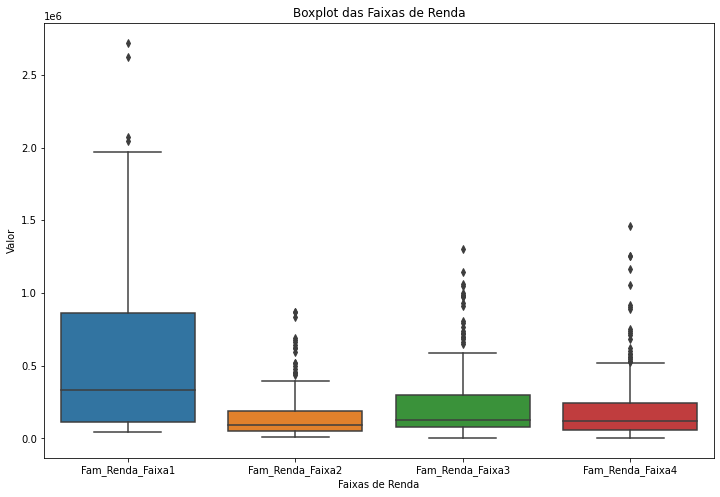

In [30]:
# Boxplot usando o DataFrame original
plt.figure(figsize=(12, 8))
sns.boxplot(x='Abreviacao', y='valor', data=df[df['Abreviacao'].isin(faixas)], order=faixas)

plt.title('Boxplot das Faixas de Renda')
plt.xlabel('Faixas de Renda')
plt.ylabel('Valor')
plt.show()

Análise de correlação: O número de cadastros de famílias aumentou ou diminuiu ao longo dos anos?

In [26]:
# dataframe filtrado
df_cadastros = df[df['Abreviacao']=='Total_Fam_Cadastradas']

# correlação entre as variáveis
df_cadastros['ano'].corr(df_cadastros['valor'])

0.11106530217302817

### Gráfico 1 - Quantidade de famílias cadastradas por faixa de renda per capita mensal


| Descrição Longa                                                                                          | Descrição Curta |
|----------------------------------------------------------------------------------------------------------|-----------------|
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*                               | FAIXA 1*        |
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**                              | FAIXA 2**       |
| Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***                             | FAIXA 3***      |
| Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)| FAIXA 4****     |


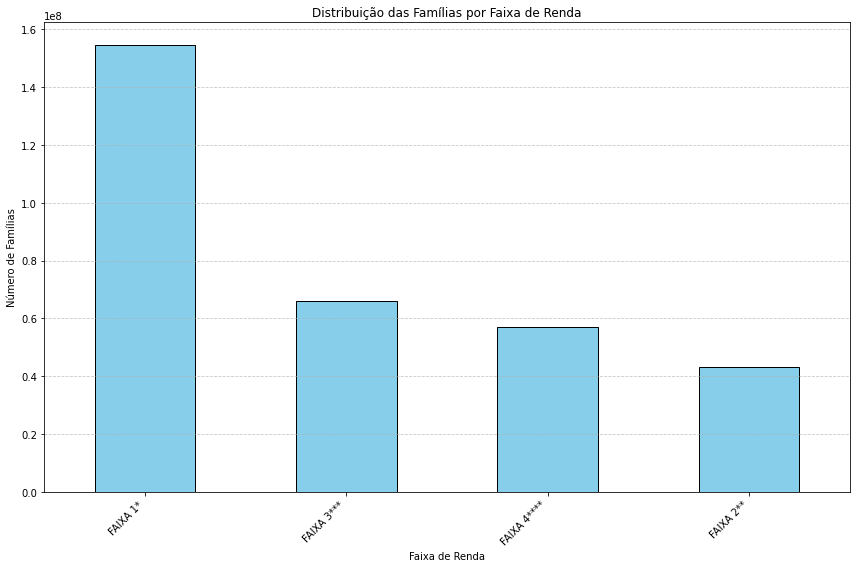

In [59]:
# mapeamento de legendas
mapeamento_legendas = {
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 1*': 'FAIXA 1*',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 2**': 'FAIXA 2**',
    'Quantidade de famílias cadastradas com renda per capita mensal na FAIXA 3***': 'FAIXA 3***',
    'Quantidade de famílias cadastradas com renda per capita mensal acima de meio salário mínimo (FAIXA 4****)': 'FAIXA 4****'
}

faixas_renda = list(mapeamento_legendas.keys())


# Filtrando o dataframe para conter apenas as linhas de interesse
df_faixas = df[df['social_subcategoria'].isin(faixas_renda)]

# Agrupando os dados por subcategoria e somando os valores
grouped = df_faixas.groupby('social_subcategoria').sum()['valor']

# Simplificando as legendas
grouped.index = grouped.index.map(mapeamento_legendas)

# Ordenando os valores (opcional)
grouped = grouped.sort_values(ascending=False)

# Plotando
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição das Famílias por Faixa de Renda")
plt.ylabel("Número de Famílias")
plt.xlabel("Faixa de Renda")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Observa-se que a maioria das famílias cadastradas no programa Bolsa Família tem renda per capita mensal de até meio salário mínimo.

### Referente ao gráfico 2 - Evolução de famílias cadastradas com membros em situação de trabalho infantil ao longo dos anos

In [60]:
# filtrando dados do nordeste 
estados_nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 
                    'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']

# dataframe com dados do nordeste
df_nordeste = df[df['no_uf'].isin(estados_nordeste)]

# filtrando as linhas de interesse
df_nordeste = df_nordeste[df_nordeste['Abreviacao'] == 'Fam_Cadas_Trab_Infantil']

df_nordeste.head()

,_id,co_uf,no_uf,ano,variavel,social_categoria,social_subcategoria,valor,Abreviacao
3836,1298,21,Maranhão,2015,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com algum m...,20461.0,Fam_Cadas_Trab_Infantil
3837,1316,21,Maranhão,2016,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com algum m...,14655.0,Fam_Cadas_Trab_Infantil
3838,1334,21,Maranhão,2017,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com algum m...,9697.0,Fam_Cadas_Trab_Infantil
3839,1352,21,Maranhão,2018,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com algum m...,5520.0,Fam_Cadas_Trab_Infantil
3840,1370,21,Maranhão,2019,Assistência Social,CadÚnico,Quantidade de famílias cadastradas com algum m...,2533.0,Fam_Cadas_Trab_Infantil


In [61]:
# agrupando os dados por ano e somando os valores
grouped = df_nordeste.groupby(['no_uf', 'ano'])['valor'].sum().unstack()
grouped

ano,2015,2016,2017,2018,2019,2020,2021,2022
no_uf,,,,,,,,
Alagoas,7085.0,5421.0,3528.0,2196.0,1107.0,725.0,365.0,210.0
Bahia,29282.0,19604.0,12381.0,8419.0,3935.0,2431.0,1539.0,883.0
Ceará,4827.0,3198.0,2050.0,1271.0,521.0,280.0,141.0,113.0
Maranhão,20461.0,14655.0,9697.0,5520.0,2533.0,1640.0,1017.0,685.0
Paraíba,13335.0,9571.0,6385.0,4158.0,2122.0,1410.0,899.0,655.0
Pernambuco,19928.0,13051.0,8032.0,4874.0,2192.0,1399.0,818.0,455.0
Piauí,9375.0,6768.0,4697.0,3411.0,1863.0,1249.0,826.0,612.0
Rio Grande do Norte,9494.0,5764.0,3569.0,2349.0,1201.0,778.0,508.0,340.0
Sergipe,3521.0,2164.0,1223.0,809.0,433.0,279.0,224.0,194.0


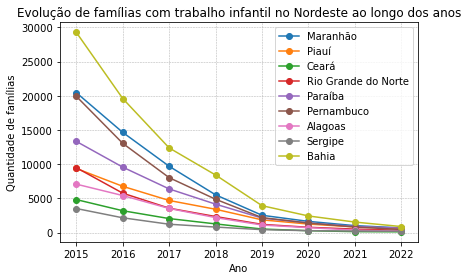

In [62]:

# Para cada estado do Nordeste, plotar a evolução ao longo dos anos
for estado in estados_nordeste:
    plt.plot(grouped.columns, grouped.loc[estado], label=estado, marker='o')

plt.title('Evolução de famílias com trabalho infantil no Nordeste ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de famílias')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Observa-se que a quantidade de famílias cadastradas com membros em situação de trabalho infantil vem diminuindo ao longo dos anos.

**Referências**

ChatGPT me deu ideia de fazer o primeiro gráfico e me deu o código de como fazer.

A ideia do segundo gráfico foi minha, mas o ChatGPT que forneceu o código.

Só tive a ajuda do ChatGPT mesmo.

Fonte dos dados: *https://dados.gov.br/dados/conjuntos-dados/dados-sociais*, *Dados do CadÚnico por estado*